# Feature space: non-ML

What kind of features are most predictive of mutational stability?

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import os
import corner
import sys
from copy import deepcopy

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


if __package__ is None:

    module_path = os.path.abspath(os.path.join('..'))
    sys.path.append(module_path)

    __package__ = os.path.basename(module_path)


from src.srv.sequence_exploration.sequence_analysis import b_tabulate_mutation_info
from src.utils.data.data_format_tools.common import load_json_as_dict
from src.utils.common.setup_new import prepare_config
from src.utils.circuit.agnostic_circuits.circuit_manager_new import CircuitModeller
from src.utils.evolution.evolver import Evolver
from src.utils.misc.numerical import count_monotonic_group_lengths
from src.utils.misc.string_handling import string_to_tuple_list
from src.utils.misc.type_handling import flatten_listlike, get_first_elements
from src.utils.results.analytics.naming import get_analytics_types_all, get_true_names_analytics, get_true_interaction_cols
from tests_local.shared import create_test_inputs, CONFIG, TEST_CONFIG, five_circuits, mutate, simulate

# config = load_json_as_dict('../tests_local/configs/simple_circuit.json')
SEQ_LENGTH = 20
config = deepcopy(CONFIG)


In [3]:
fn = '../data/ensemble_mutation_effect_analysis/2023_04_05_223653/summarise_simulation/tabulated_mutation_info.csv'
info = pd.read_csv(fn)

In [4]:
# circuits, config, result_writer, info = create_test_inputs(deepcopy(CONFIG))

# circuits, config, data_writer = five_circuits(config, data_writer=None)

In [5]:

# circuits, config, data_writer = mutate(circuits, config, data_writer)

In [6]:

# circuits, config, data_writer = simulate(circuits, config, data_writer)

In [7]:


# info = b_tabulate_mutation_info(data_writer.ensemble_write_dir,
#                                 data_writer=data_writer, experiment_config=config)

In [8]:
# circuits = [Evolver(data_writer=result_writer,
#                     sequence_type=config.get('system_type')).mutate(
#             c,
#             write_to_subsystem=True,
#             algorithm=config.get('mutations', {}).get('algorithm', 'random')) for c in circuits]
# circuit_modeller = CircuitModeller(result_writer=result_writer, config=config)
# circuits = circuit_modeller.batch_circuits(
#     circuits=circuits,
#     methods={
#         "compute_interactions": {},
#         "init_circuits": {'batch': True},
#         'simulate_signal_batch': {'ref_circuit': None,
#                                   'batch': config['simulation']['use_batch_mutations']},
#         'write_results': {'no_visualisations': False, # config['experiment']['no_visualisations'],
#                           'no_numerical': False} #config['experiment']['no_numerical']}
#     }
# )



In [9]:
# circuits[1].interactions.__dict__

## Process summary

In [10]:
num_group_cols = [e.replace('energies', 'binding_sites_groups') for e in get_true_interaction_cols(info, 'energies')]
num_bs_cols = [e.replace('energies', 'binding_sites_count') for e in get_true_interaction_cols(info, 'energies')]


In [11]:
for b, g, bs in zip(get_true_interaction_cols(info, 'binding_sites'), num_group_cols, num_bs_cols):
    fbs = [string_to_tuple_list(bb) for bb in info[b]]
    first = get_first_elements(fbs, empty_replacement=[])
    info[bs] = [count_monotonic_group_lengths(bb) for bb in first]
    info[g] = info[bs].apply(len)


In [12]:
good_cols = list(info.columns)
[good_cols.remove(x) for x in get_true_interaction_cols(info, 'binding_rates_dissociation') + get_true_interaction_cols(info, 'eqconstants') +
 get_true_interaction_cols(info, 'energies') + get_true_interaction_cols(info, 'binding_sites') + num_group_cols + num_bs_cols]
good_cols


['circuit_name',
 'mutation_name',
 'mutation_num',
 'mutation_type',
 'mutation_positions',
 'path_to_template_circuit',
 'name',
 'interacting',
 'self_interacting',
 'num_interacting',
 'num_self_interacting',
 'num_interacting_diff_to_base_circuit',
 'num_self_interacting_diff_to_base_circuit',
 'num_interacting_ratio_from_mutation_to_base',
 'num_self_interacting_ratio_from_mutation_to_base',
 'fold_change',
 'final_deriv',
 'initial_steady_states',
 'max_amount',
 'min_amount',
 'overshoot',
 'RMSE',
 'steady_states',
 'response_time_wrt_species-6',
 'response_time_wrt_species-6_diff_to_base_circuit',
 'response_time_wrt_species-6_ratio_from_mutation_to_base',
 'precision_wrt_species-6',
 'precision_wrt_species-6_diff_to_base_circuit',
 'precision_wrt_species-6_ratio_from_mutation_to_base',
 'sensitivity_wrt_species-6',
 'sensitivity_wrt_species-6_diff_to_base_circuit',
 'sensitivity_wrt_species-6_ratio_from_mutation_to_base',
 'fold_change_diff_to_base_circuit',
 'final_deriv_di

In [13]:
binding_idx_map = {e.replace('energies_', ''): i for i, e in enumerate(get_true_interaction_cols(info, 'energies'))}

In [14]:
infom = info.melt(good_cols, value_vars=get_true_interaction_cols(info, 'energies'), var_name='energies_idx', value_name='energies')
dfm = info.melt(good_cols, value_vars=num_group_cols, var_name='num_groups_idx', value_name='num_groups')
infom['idx_species_binding'] = dfm['num_groups_idx'].apply(lambda x: binding_idx_map[x.replace('binding_sites_groups_', '')])
infom['num_groups'] = dfm['num_groups']
dfm = info.melt(good_cols, value_vars=num_bs_cols, var_name='num_bs_idx', value_name='num_bs')
infom['num_bs'] = dfm['num_bs']

for k in ['binding_sites', 'binding_rates_dissociation', 'eqconstants']:
    dfm = info.melt(good_cols, value_vars=get_true_interaction_cols(info, k), var_name=f'{k}_idx', value_name=k)
    infom[k] = dfm[k]


## Visualisations

In [15]:
# sns.jointplot(infom, x='energies', y='RMSE', hue='num_groups')

<AxesSubplot: xlabel='energies', ylabel='RMSE'>

/home/wadh6511/Kode/env_circuits/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/wadh6511/Kode/env_circuits/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


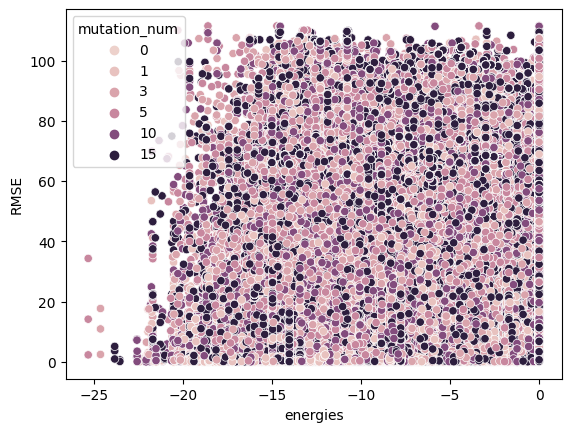

In [16]:
sns.scatterplot(infom, x='energies', y='RMSE', hue='mutation_num')

In [ ]:
sns.kdeplot(infom, x='energies', y='RMSE', fill=True, cbar=True)


In [17]:
infom.columns

Index(['circuit_name', 'mutation_name', 'mutation_num', 'mutation_type',
       'mutation_positions', 'path_to_template_circuit', 'name', 'interacting',
       'self_interacting', 'num_interacting', 'num_self_interacting',
       'num_interacting_diff_to_base_circuit',
       'num_self_interacting_diff_to_base_circuit',
       'num_interacting_ratio_from_mutation_to_base',
       'num_self_interacting_ratio_from_mutation_to_base', 'fold_change',
       'final_deriv', 'initial_steady_states', 'max_amount', 'min_amount',
       'overshoot', 'RMSE', 'steady_states', 'response_time_wrt_species-6',
       'response_time_wrt_species-6_diff_to_base_circuit',
       'response_time_wrt_species-6_ratio_from_mutation_to_base',
       'precision_wrt_species-6',
       'precision_wrt_species-6_diff_to_base_circuit',
       'precision_wrt_species-6_ratio_from_mutation_to_base',
       'sensitivity_wrt_species-6',
       'sensitivity_wrt_species-6_diff_to_base_circuit',
       'sensitivity_wrt_specie

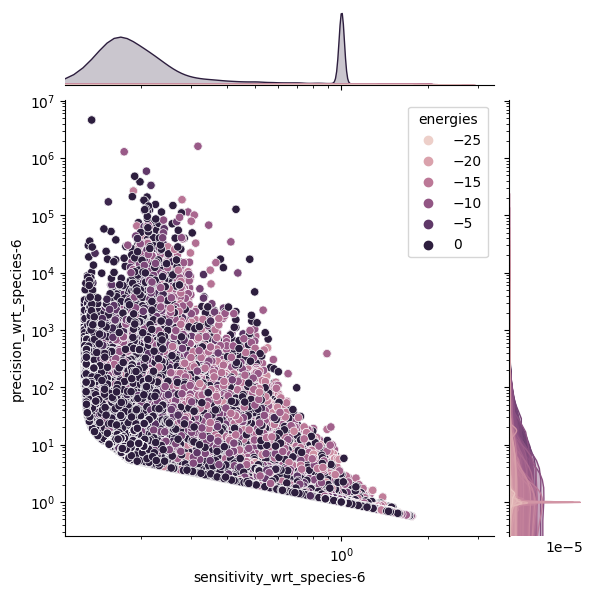

In [56]:
sns.jointplot(infom, x='sensitivity_wrt_species-6', y='precision_wrt_species-6', hue='energies')
plt.xscale('log')
plt.yscale('log')

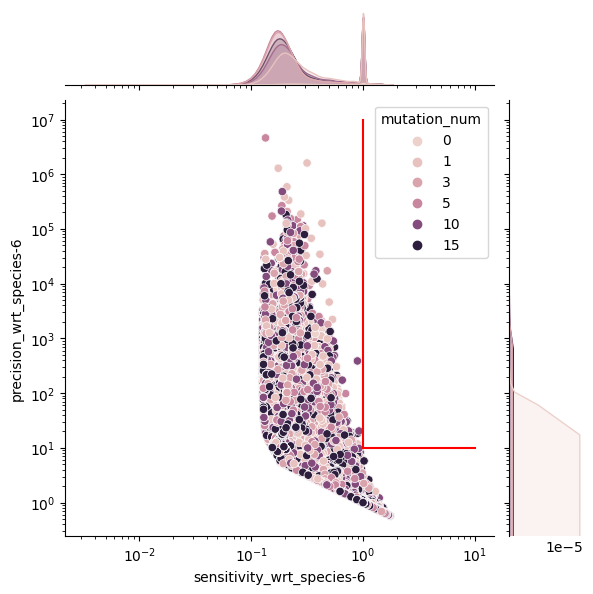

In [61]:
sns.jointplot(infom, x='sensitivity_wrt_species-6', y='precision_wrt_species-6', hue='mutation_num')
plt.xscale('log')
plt.yscale('log')

plt.plot(np.ones(100), np.linspace(10, 1e7, 100), color='r')
plt.plot(np.linspace(1, 10, 40), np.ones(40) * 10, color='r')

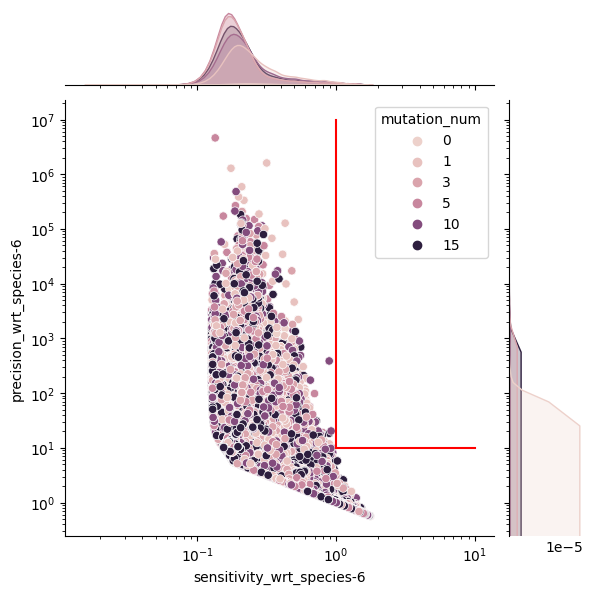

In [62]:
sns.jointplot(infom[infom['sample_name'] != 'RNA_0'], x='sensitivity_wrt_species-6', y='precision_wrt_species-6', hue='mutation_num')
plt.xscale('log')
plt.yscale('log')

plt.plot(np.ones(100), np.linspace(10, 1e7, 100), color='r')
plt.plot(np.linspace(1, 10, 40), np.ones(40) * 10, color='r')

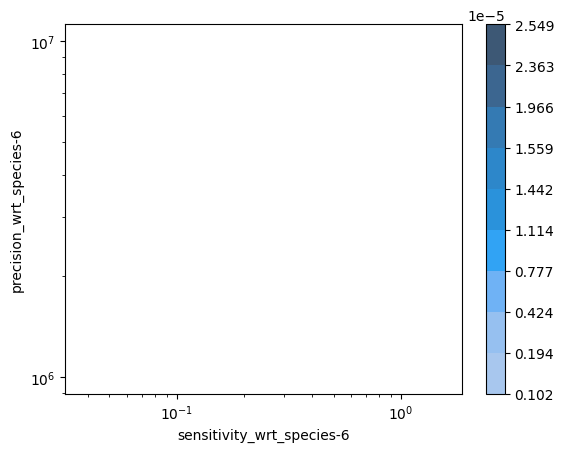

In [18]:
# sns.jointplot(infom, x='sensitivity_wrt_species-6', y='precision_wrt_species-6', hue='energies')
sns.kdeplot(infom, x='sensitivity_wrt_species-6', y='precision_wrt_species-6')
plt.xscale('log')
plt.yscale('log')

/home/wadh6511/Kode/env_circuits/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/wadh6511/Kode/env_circuits/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


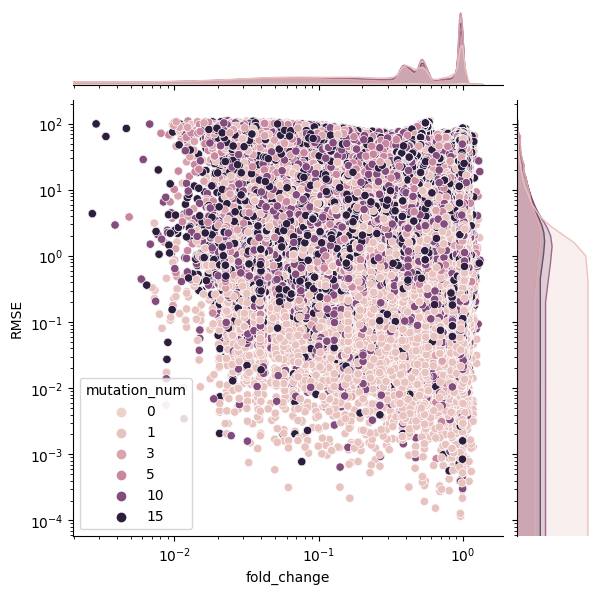

In [19]:
sns.jointplot(infom, x='fold_change', y='RMSE', hue='mutation_num')
plt.xscale('log')
plt.yscale('log')

/home/wadh6511/Kode/env_circuits/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/wadh6511/Kode/env_circuits/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


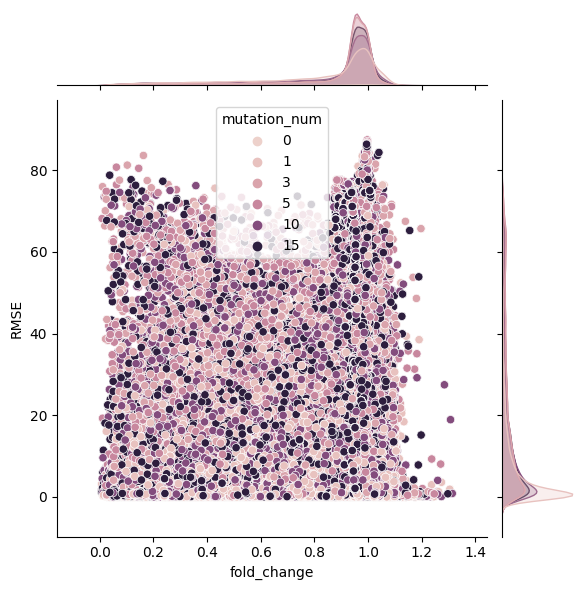

In [20]:
sns.jointplot(infom[infom['sample_name'] != 'RNA_0'], x='fold_change', y='RMSE', hue='mutation_num')
# plt.xscale('log')
# plt.yscale('log')

In [21]:
# sns.jointplot(infom, x='fold_change', y='precision_wrt_species-6', hue='sensitivity_wrt_species-6')
# plt.xscale('log')
# plt.yscale('log')

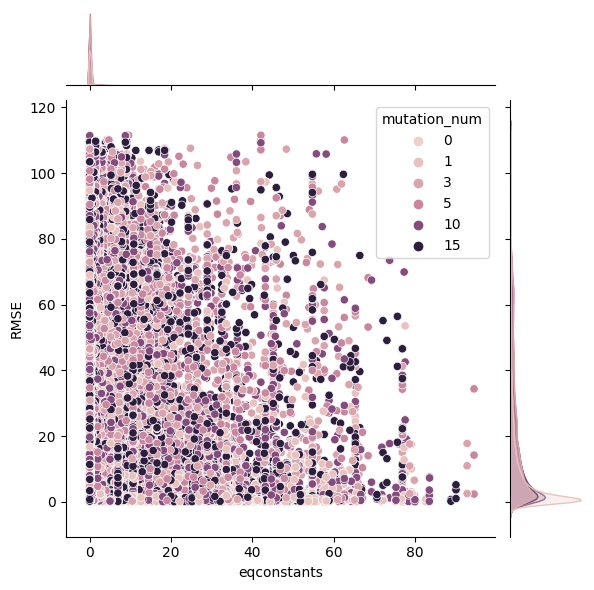

In [22]:
sns.jointplot(infom, x='eqconstants', y='RMSE', hue='mutation_num')

In [23]:
# sns.jointplot(infom, x='binding_rates_dissociation', y='RMSE', hue='mutation_num')

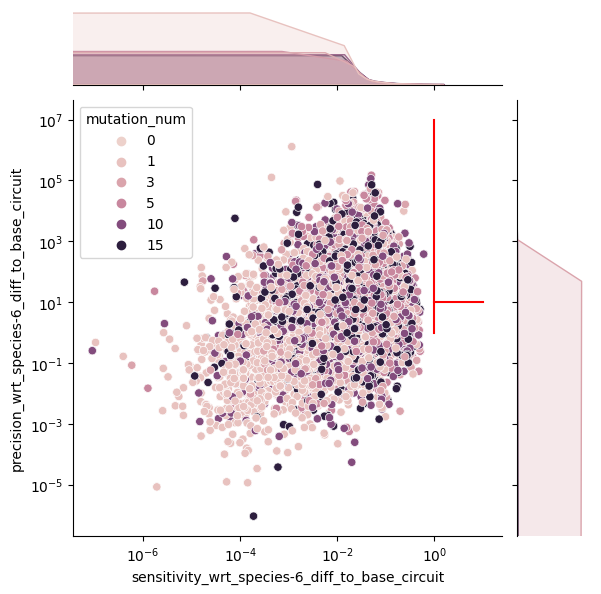

In [60]:
sns.jointplot(infom, x='sensitivity_wrt_species-6_diff_to_base_circuit', y='precision_wrt_species-6_diff_to_base_circuit', hue='mutation_num')
plt.xscale('log')
plt.yscale('log')

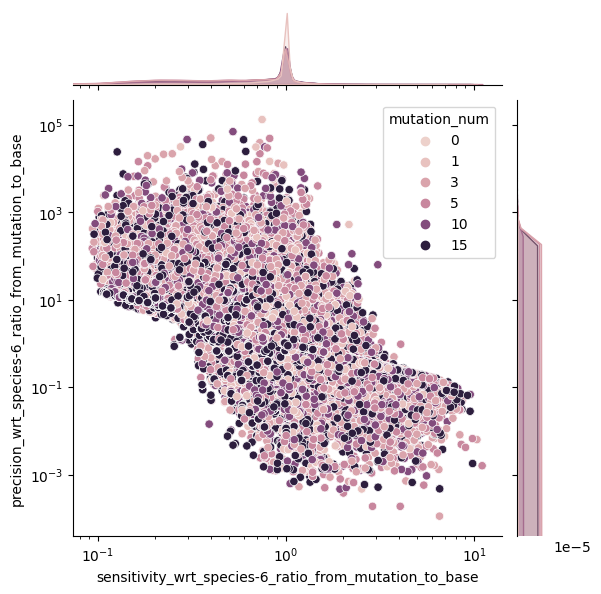

In [25]:
sns.jointplot(infom, x='sensitivity_wrt_species-6_ratio_from_mutation_to_base', y='precision_wrt_species-6_ratio_from_mutation_to_base', hue='mutation_num')
plt.xscale('log')
plt.yscale('log')

In [26]:
# sns.scatterplot(infom[infom['mutation_name'] == 'ref_circuit'], x='sensitivity_wrt_species-6', y='precision_wrt_species-6', hue='energies')
# plt.xscale('log')
# plt.yscale('log')

In [27]:
# sns.jointplot(infom, x='sensitivity_wrt_species-6_diff_to_base_circuit', y='precision_wrt_species-6_diff_to_base_circuit', hue='mutation_num')
# plt.yscale('log')

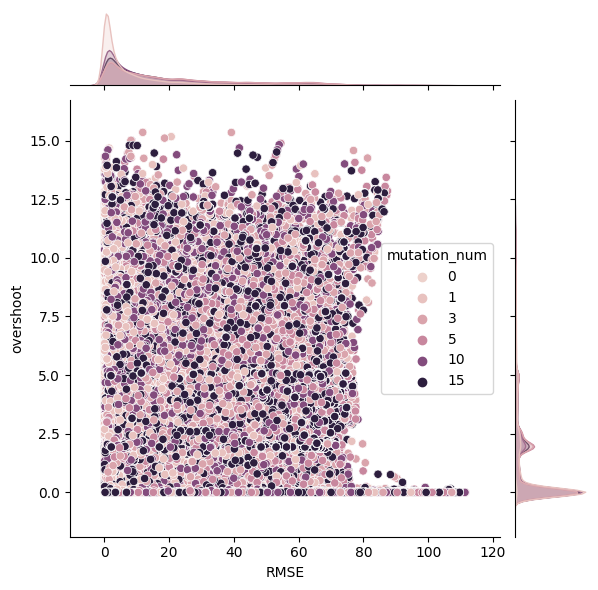

In [28]:
sns.jointplot(infom, x='RMSE', y='overshoot', hue='mutation_num')
# plt.yscale('log')

<AxesSubplot: xlabel='fold_change', ylabel='sensitivity_wrt_species-6_diff_to_base_circuit'>

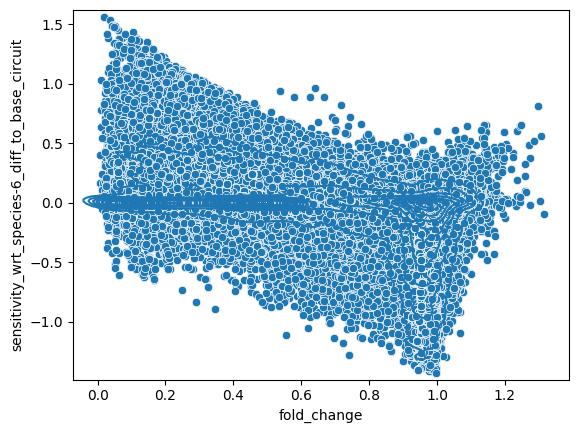

In [29]:
sns.scatterplot(infom, x='fold_change', y='sensitivity_wrt_species-6_diff_to_base_circuit') #, hue='mutation_num')
sns.kdeplot(infom, x='fold_change', y='sensitivity_wrt_species-6_diff_to_base_circuit') #, fill=True, cbar=True) #, hue='mutation_num')
# plt.yscale('log')

<AxesSubplot: xlabel='steady_states', ylabel='RMSE'>

/home/wadh6511/Kode/env_circuits/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/wadh6511/Kode/env_circuits/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


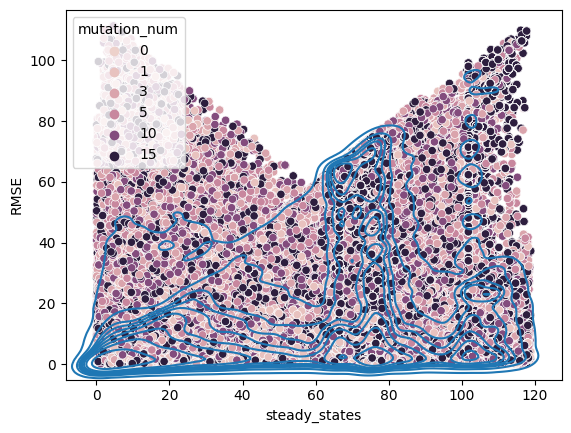

In [70]:
sns.scatterplot(infom, x='steady_states', y='RMSE', hue='mutation_num')
sns.kdeplot(infom, x='steady_states', y='RMSE') #, fill=True, cbar=True) #, hue='mutation_num')

Relevant columns 

In [30]:
relevant_cols = [
    'fold_change', 
    # 'initial_steady_states', 
    # 'max_amount', 'min_amount',
    'overshoot', 
    'RMSE', 
    'steady_states', 
    # 'response_time_wrt_species-6',
    # 'response_time_wrt_species-6_diff_to_base_circuit',
    # 'response_time_wrt_species-6_ratio_from_mutation_to_base',
    'precision_wrt_species-6',
    'precision_wrt_species-6_diff_to_base_circuit',
    'precision_wrt_species-6_ratio_from_mutation_to_base',
    'sensitivity_wrt_species-6',
    'sensitivity_wrt_species-6_diff_to_base_circuit',
    'sensitivity_wrt_species-6_ratio_from_mutation_to_base',
    'fold_change_diff_to_base_circuit',
    # 'initial_steady_states_diff_to_base_circuit',
    # 'max_amount_diff_to_base_circuit', 'min_amount_diff_to_base_circuit',
    'overshoot_diff_to_base_circuit', 
    # 'RMSE_diff_to_base_circuit',
    'steady_states_diff_to_base_circuit',
    'fold_change_ratio_from_mutation_to_base',
    # 'initial_steady_states_ratio_from_mutation_to_base',
    # 'max_amount_ratio_from_mutation_to_base',
    # 'min_amount_ratio_from_mutation_to_base',
    # 'overshoot_ratio_from_mutation_to_base',
    # 'RMSE_ratio_from_mutation_to_base',
    'steady_states_ratio_from_mutation_to_base', 
    'energies', 
    # 'num_groups',
    'binding_rates_dissociation',
    'eqconstants'
    ]
info_summ = infom.groupby(['circuit_name', 'mutation_num'], as_index=False).agg(
    {c: ['std', 'mean'] for c in relevant_cols})

    


<AxesSubplot: xlabel='RMSE', ylabel='Count'>

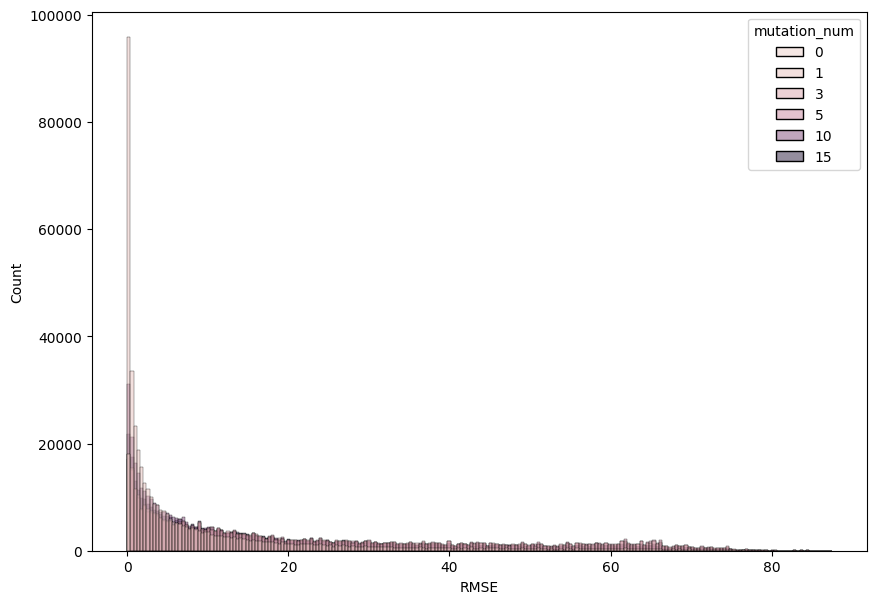

In [54]:
plt.figure(figsize=(10,7))
sns.histplot(infom[infom['sample_name'] != 'RNA_0'], x='RMSE', hue='mutation_num')


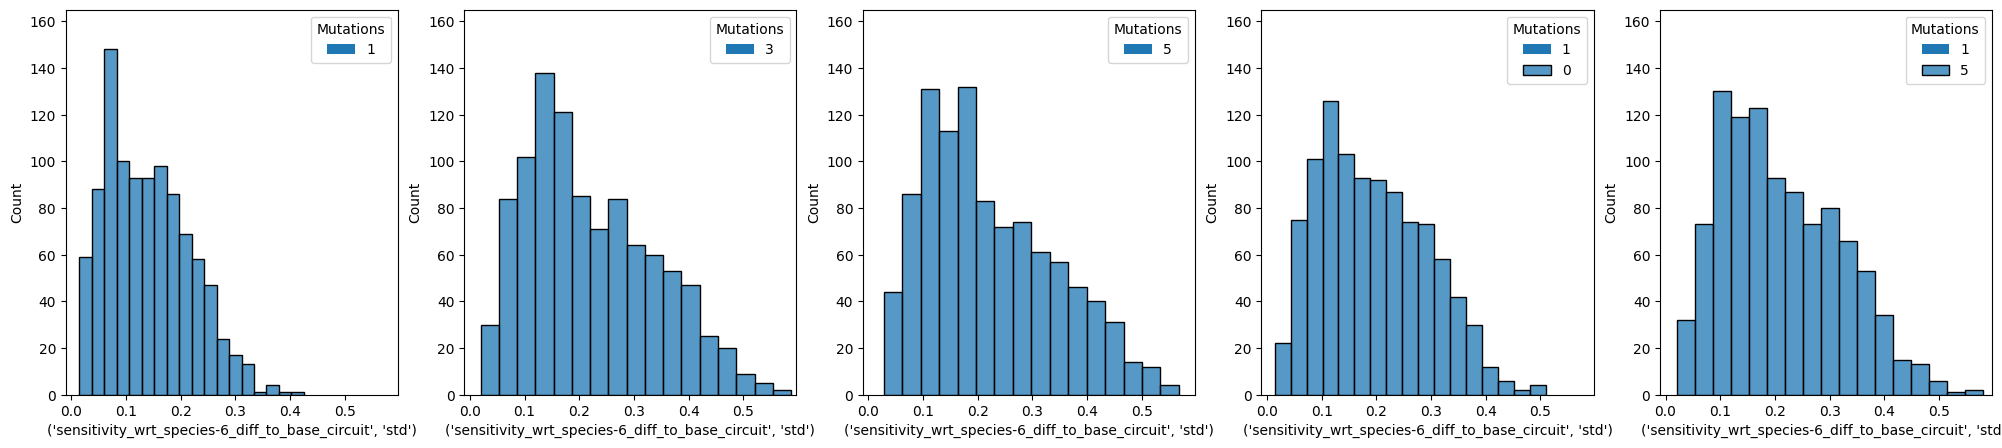

In [32]:
plt.figure(figsize=(5*len(info_summ['mutation_num'].unique()), 5))
for i, m in enumerate(info_summ['mutation_num'].unique()):
    if m != 0:
        ax = plt.subplot(1, len(info_summ['mutation_num'].unique()), i)
        sns.histplot(info_summ[info_summ['mutation_num'] == m], x=('sensitivity_wrt_species-6_diff_to_base_circuit', 'std'))
        plt.legend(str(m), title='Mutations')
        plt.xlim([info_summ[('sensitivity_wrt_species-6_diff_to_base_circuit', 'std')].min() - 0.01, info_summ[('sensitivity_wrt_species-6_diff_to_base_circuit', 'std')].max() + 0.01])
        plt.ylim([0,165])


<AxesSubplot: xlabel="('sensitivity_wrt_species-6_diff_to_base_circuit', 'std')", ylabel='Count'>

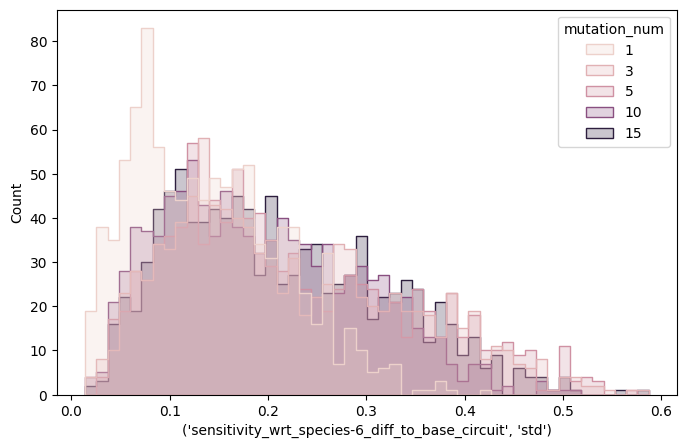

In [53]:
plt.figure(figsize=(8,5))
sns.histplot(info_summ[info_summ['mutation_num'] != 0], x=('sensitivity_wrt_species-6_diff_to_base_circuit', 'std'), hue='mutation_num', element="step", bins=50)


<AxesSubplot: xlabel="('precision_wrt_species-6_diff_to_base_circuit', 'std')", ylabel='Count'>

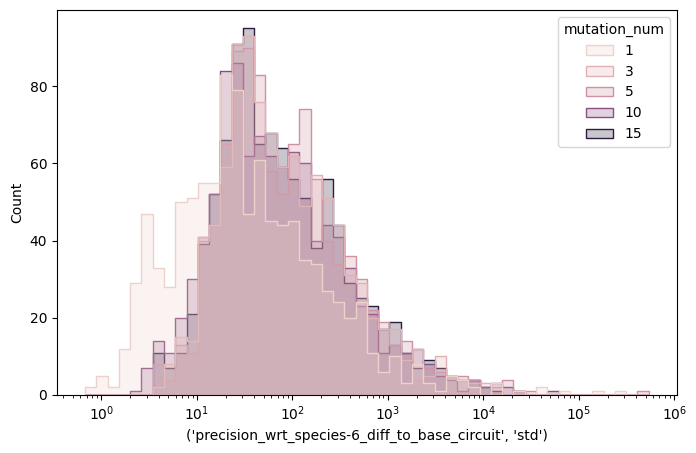

In [73]:
plt.figure(figsize=(8,5))
sns.histplot(info_summ[info_summ['mutation_num'] != 0], x=('precision_wrt_species-6_diff_to_base_circuit', 'std'), hue='mutation_num', element="step", bins=50, log_scale=[True, False])


Mutational stability?

In [77]:
info_summ[('precision_over_sensitivity', 'std')] = info_summ[('precision_wrt_species-6', 'std')] / info_summ[('sensitivity_wrt_species-6', 'std')]
info_summ[('precision_over_sensitivity', 'mean')] = info_summ[('precision_wrt_species-6', 'mean')] / info_summ[('sensitivity_wrt_species-6', 'mean')]


<AxesSubplot: xlabel="('RMSE', 'std')", ylabel='Count'>

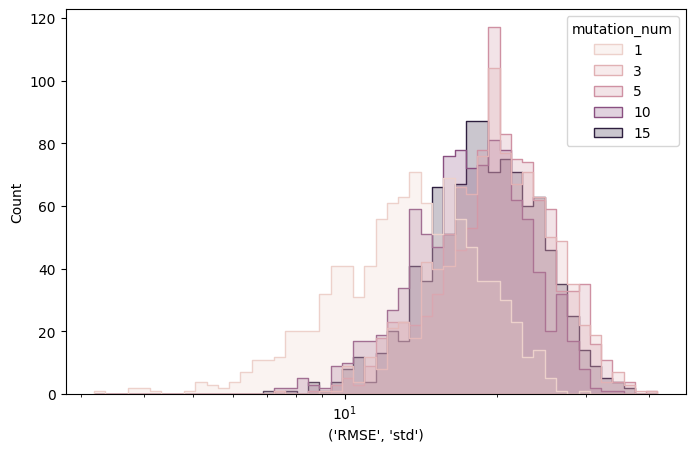

In [74]:
plt.figure(figsize=(8,5))
sns.histplot(info_summ[info_summ['mutation_num'] != 0], x=('RMSE', 'std'), hue='mutation_num', element="step", bins=50, log_scale=[True, False])


<Figure size 800x500 with 0 Axes>

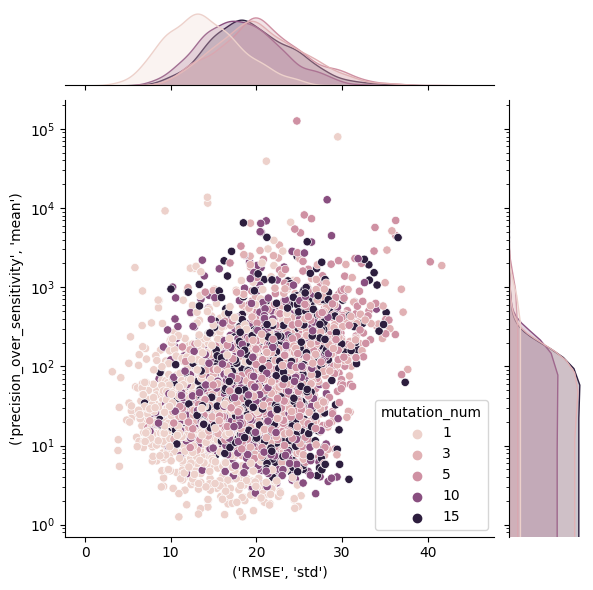

In [79]:
plt.figure(figsize=(8,5))
sns.jointplot(info_summ[info_summ['mutation_num'] != 0], x=('RMSE', 'std'), y=('precision_over_sensitivity', 'mean'), hue='mutation_num')
plt.yscale('log')

In [83]:
info_summ

circuit_name mutation_num fold_change           overshoot  \
                                                  std      mean       std   
0     toy_mRNA_circuit_10000            0    0.255830  0.710997  3.498100   
1     toy_mRNA_circuit_10000            1    0.265114  0.694645  2.969601   
2     toy_mRNA_circuit_10000            3    0.268809  0.718523  2.076969   
3     toy_mRNA_circuit_10000            5    0.247268  0.739807  2.009095   
4     toy_mRNA_circuit_10000           10    0.286540  0.682888  2.342879   
...                      ...          ...         ...       ...       ...   
5995  toy_mRNA_circuit_36038            1    0.253202  0.719609  2.853047   
5996  toy_mRNA_circuit_36038            3    0.248825  0.734368  1.790617   
5997  toy_mRNA_circuit_36038            5    0.251455  0.723048  1.717201   
5998  toy_mRNA_circuit_36038           10    0.260586  0.715436  2.484746   
5999  toy_mRNA_circuit_36038           15    0.243786  0.753895  1.789497   

                     RMSE            steady_states             ...  \
          mean        std       mean           std       mean  ...   
0     2.427292   0.000000   0.000000     32.461883  51.970791  ...   
1     2.145111  10.510554   9.826657     31.986765  53.170548  ...   
2     1.592508  15.850224  19.780676     33.167551  57.066966  ...   
3     1.480721  19.427852  24.312903     33.645612  59.176143  ...   
4     1.783989  15.762879  18.929341     32.218432  52.923029  ...   
...        ...        ...        ...           ...        ...  ...   
5995  2.014890  13.635172  11.529621     32.157127  57.221367  ...   
5996  1.578864  15.664070  18.116787     30.820478  61.301069  ...   
5997  1.506358  16.608315  20.516767     30.208845  60.894349  ...   
5998  1.778938  17.389969  16.590487     31.676827  58.142950  ...   
5999  1.661039  13.854025  19.229637     31.026081  62.296291  ...   

     steady_states_ratio_from_mutation_to_base            energies            \
                                           std      mean       std      mean   
0                                     0.000000  1.000000  3.043078 -2.642222   
1                                     0.696505  1.200618  2.981168 -2.156759   
2                                     1.716130  1.695483  3.103144 -1.498056   
3                                     2.394866  2.114307  3.182950 -1.604630   
4                                     1.464802  1.561876  3.067265 -1.834676   
...                                        ...       ...       ...       ...   
5995                                  1.259779  1.390270  2.892464 -1.927870   
5996                                  1.683920  1.774727  2.380984 -1.169630   
5997                                  1.799640  1.878130  2.504572 -1.261296   
5998                                  1.589739  1.640842  2.657394 -1.572130   
5999                                  1.591752  1.810819  2.227140 -1.097963   

     binding_rates_dissociation           eqconstants            \
                            std      mean         std      mean   
0                      0.108444  0.131166    0.072353  0.064679   
1                      0.102376  0.150262    0.098102  0.062269   
2                      0.088636  0.179087    1.277619  0.203477   
3                      0.090831  0.175763    2.731945  0.292360   
4                      0.095827  0.163458    0.365905  0.101475   
...                         ...       ...         ...       ...   
5995                   0.098774  0.156161    0.207362  0.067857   
5996                   0.085078  0.182837    0.097525  0.037075   
5997                   0.086679  0.180305    0.155728  0.045899   
5998                   0.093917  0.168324    0.106627  0.047415   
5999                   0.084217  0.183806    0.050329  0.028462   

     precision_over_sensitivity             
                            std       mean  
0                     22.774311   9.980701  
1                    132.821334  20.410400  
2         

In [87]:
import plotly.express as px
info_summ['RMSE' + 'std'] = info_summ[('RMSE', 'std')]
info_summ['precision_wrt_species-6' + 'mean'] = info_summ[('precision_wrt_species-6', 'mean')]
info_summ['sensitivity_wrt_species-6' + 'mean'] = info_summ[('sensitivity_wrt_species-6', 'mean')]
info_summ['robust'] = (info_summ['sensitivity_wrt_species-6' + 'mean'] > 0.9) & (info_summ['precision_wrt_species-6' + 'mean'] > 5)
fig = px.scatter_3d(
    info_summ[info_summ['mutation_num'] != 0],
    x='sensitivity_wrt_species-6' + 'mean', y='precision_wrt_species-6' + 'mean', z='RMSE' + 'std', 
    color='mutation_num', shape='robust', log_y=True, log_z=True)
fig.show()


## Examine correlations

In [34]:
infom[relevant_cols + ['mutation_num']].corr()

fold_change  overshoot  \
fold_change                                            1.000000   0.618285   
overshoot                                              0.618285   1.000000   
RMSE                                                   0.157746   0.198278   
steady_states                                          0.024900   0.137486   
precision_wrt_species-6                                0.011833   0.012637   
precision_wrt_species-6_diff_to_base_circuit           0.008665   0.008899   
precision_wrt_species-6_ratio_from_mutation_to_...     0.027141   0.018285   
sensitivity_wrt_species-6                             -0.922530  -0.639261   
sensitivity_wrt_species-6_diff_to_base_circuit        -0.421016  -0.261088   
sensitivity_wrt_species-6_ratio_from_mutation_t...    -0.401638  -0.283613   
fold_change_diff_to_base_circuit                       0.295275   0.167406   
overshoot_diff_to_base_circuit                         0.113605   0.386283   
steady_states_diff_to_base_circuit                     0.224361   0.235787   
fold_change_ratio_from_mutation_to_base                0.054063   0.021581   
steady_states_ratio_from_mutation_to_base              0.120544   0.082478   
energies                                               0.090843   0.000020   
binding_rates_dissociation                             0.072657  -0.006934   
eqconstants                                           -0.039846  -0.006535   
mutation_num                                           0.015622   0.005759   

                                                        RMSE  steady_states  \
fold_change                                         0.157746       0.024900   
overshoot                                           0.198278       0.137486   
RMSE                                                1.000000       0.310411   
steady_states                                       0.310411       1.000000   
precision_wrt_species-6                            -0.002355      -0.006472   
precision_wrt_species-6_diff_to_base_circuit       -0.001770      -0.005784   
precision_wrt_species-6_ratio_from_mutation_to_...  0.001546      -0.020027   
sensitivity_wrt_species-6                          -0.167962       0.121691   
sensitivity_wrt_species-6_diff_to_base_circuit     -0.390557      -0.154581   
sensitivity_wrt_species-6_ratio_from_mutation_t... -0.218113      -0.203890   
fold_change_diff_to_base_circuit                    0.426315       0.245029   
overshoot_diff_to_base_circuit                      0.288740       0.153999   
steady_states_diff_to_base_circuit                  0.567775       0.441857   
fold_change_ratio_from_mutation_to_base             0.441268       0.162240   
steady_states_ratio_from_mutation_to_base           0.317884       0.061935   
energies                                            0.105337       0.156510   
binding_rates_dissociation                          0.116737       0.144477   
eqconstants                                        -0.031377      -0.055829   
mutation_num                                        0.076403       0.021140   

                                                    precision_wrt_species-6  \
fold_change                                                        0.011833   
overshoot                                                          0.012637   
RMSE                                                              -0.002355   
steady_states                                                     -0.006472   
precision_wrt_species-6                                            1.000000   
precision_wrt_species-6_diff_to_base_circuit                       0.999478   
precision_wrt_species-6_ratio_from_mutation_to_...                 0.499942   
sensitivity_wrt_species-6                                         -0.010998   
sensitivity_wrt_species-6_diff_to_base_circuit                    -0.002051   
sensitivity_wrt_species-6_ratio_from_mutation_t...                -0.004063   
fold_change_diff_to_base_circuit         

In [35]:
infom[infom['sample_name'] != 'RNA_0'][relevant_cols + ['mutation_num']].corr()['mutation_num'].sort_values()

sensitivity_wrt_species-6_diff_to_base_circuit          -0.026182
sensitivity_wrt_species-6                               -0.024830
sensitivity_wrt_species-6_ratio_from_mutation_to_base   -0.014638
eqconstants                                             -0.004406
precision_wrt_species-6                                 -0.002399
precision_wrt_species-6_diff_to_base_circuit            -0.002392
precision_wrt_species-6_ratio_from_mutation_to_base      0.000393
overshoot                                                0.008049
overshoot_diff_to_base_circuit                           0.008089
steady_states_ratio_from_mutation_to_base                0.014607
fold_change_ratio_from_mutation_to_base                  0.017542
fold_change                                              0.022370
fold_change_diff_to_base_circuit                         0.022782
energies                                                 0.024827
steady_states                                            0.026524
steady_sta

<AxesSubplot: xlabel='sensitivity_wrt_species-6_diff_to_base_circuit', ylabel='Count'>

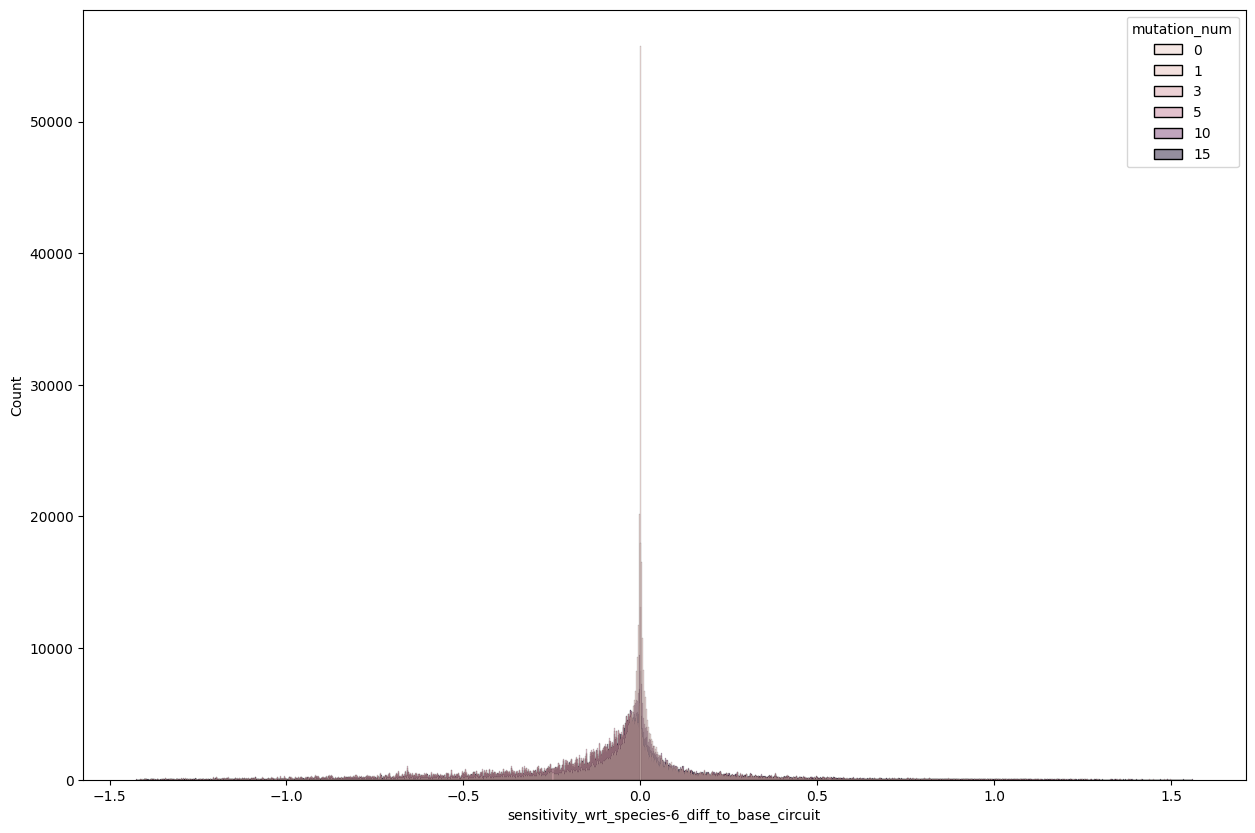

In [36]:
plt.figure(figsize=(15,10))
sns.histplot(infom[infom['sample_name'] != 'RNA_0'], x='sensitivity_wrt_species-6_diff_to_base_circuit', hue='mutation_num')


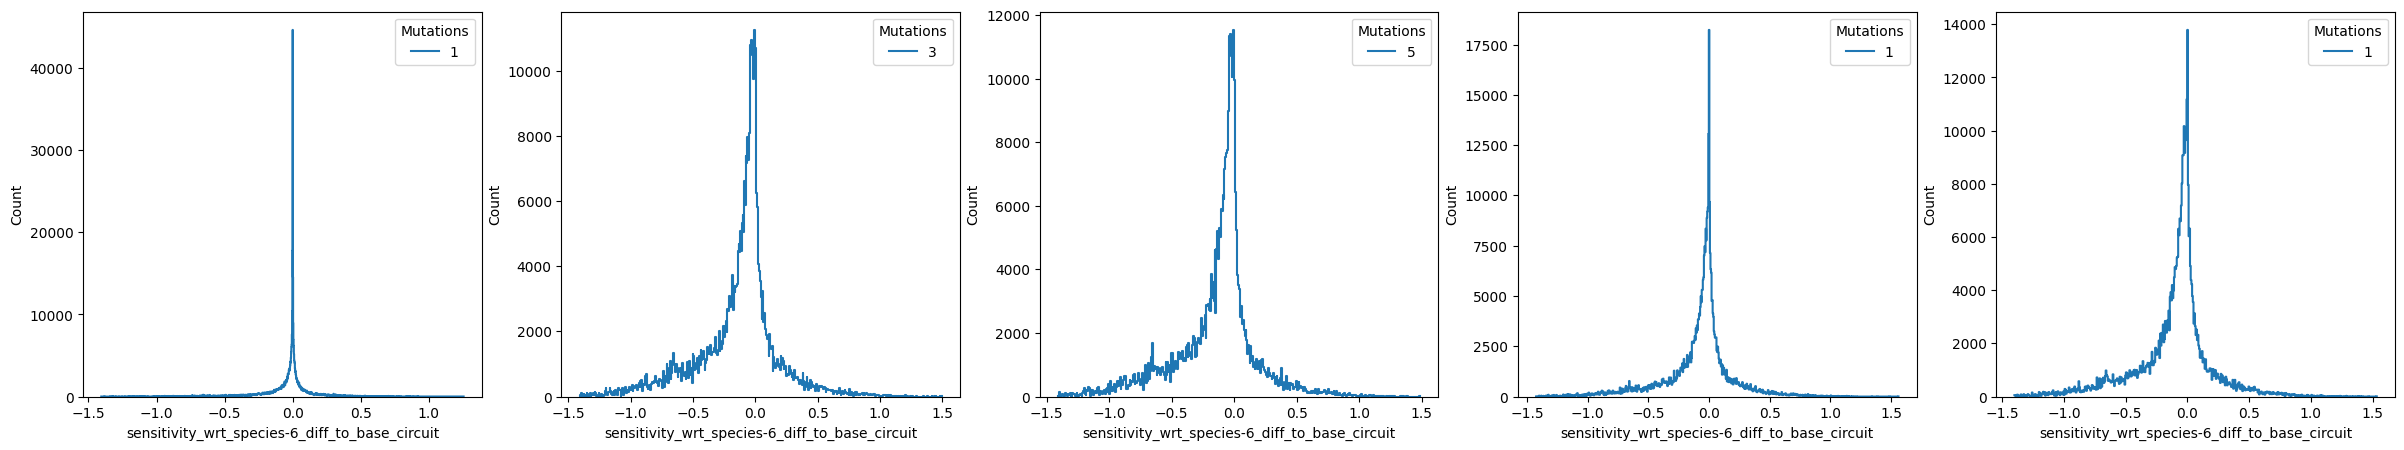

In [37]:
plt.figure(figsize=(6*len(info_summ['mutation_num'].unique()), 5))
for i, m in enumerate(info_summ['mutation_num'].unique()):
    if m != 0:
        ax = plt.subplot(1, len(info_summ['mutation_num'].unique()), i)
        sns.histplot(infom[(infom['sample_name'] != 'RNA_0') & (infom['mutation_num'] == m)], x='sensitivity_wrt_species-6_diff_to_base_circuit', stat='count', element='step', fill=False)
        plt.legend(str(m), title='Mutations')
        # plt.xlim([info_summ[('sensitivity_wrt_species-6_diff_to_base_circuit', 'std')].min() - 0.01, info_summ[('sensitivity_wrt_species-6_diff_to_base_circuit', 'std')].max() + 0.01])
        # plt.ylim([0,165])


<AxesSubplot: xlabel='binding_rates_dissociation', ylabel='Count'>

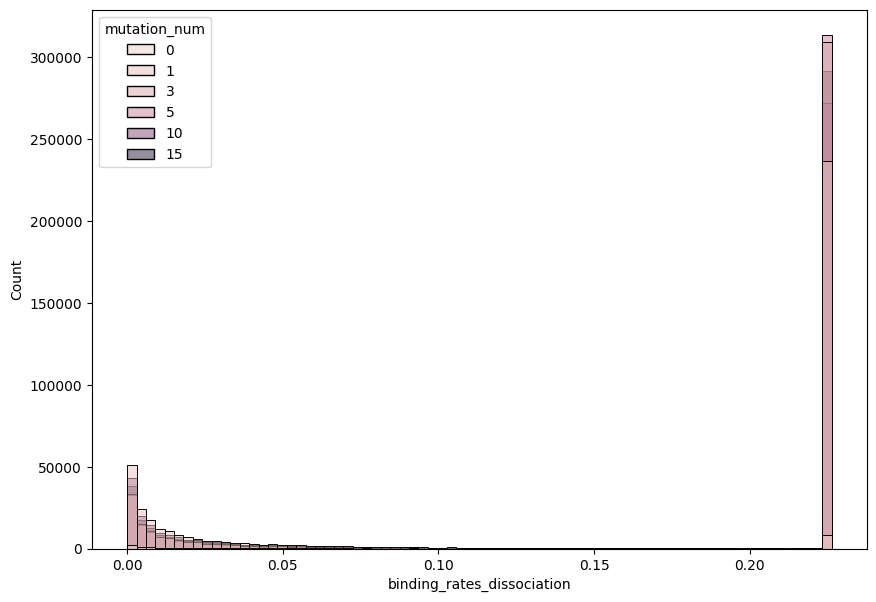

In [38]:
plt.figure(figsize=(10,7))
sns.histplot(infom[infom['sample_name'] != 'RNA_0'], x='binding_rates_dissociation', hue='mutation_num')


<AxesSubplot: xlabel='eqconstants', ylabel='Count'>

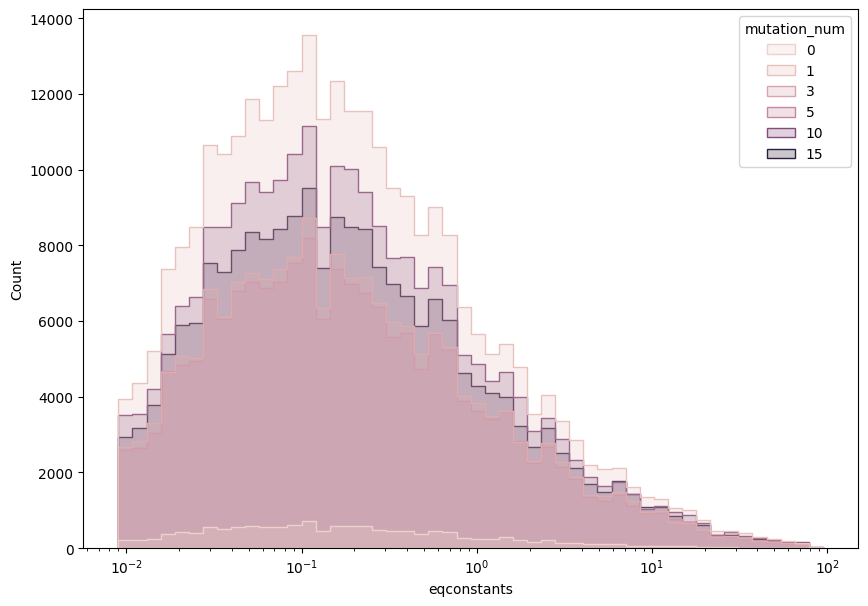

In [39]:
plt.figure(figsize=(10,7))
sns.histplot(infom[infom['eqconstants'] > 0.009], x='eqconstants', hue = 'mutation_num', multiple='layer', element='step', stat='count', log_scale=[True, False], bins=50)
# plt.xscale('log')


In [40]:
infom['eqconstants'].mode()

0    0.00667
Name: eqconstants, dtype: float64

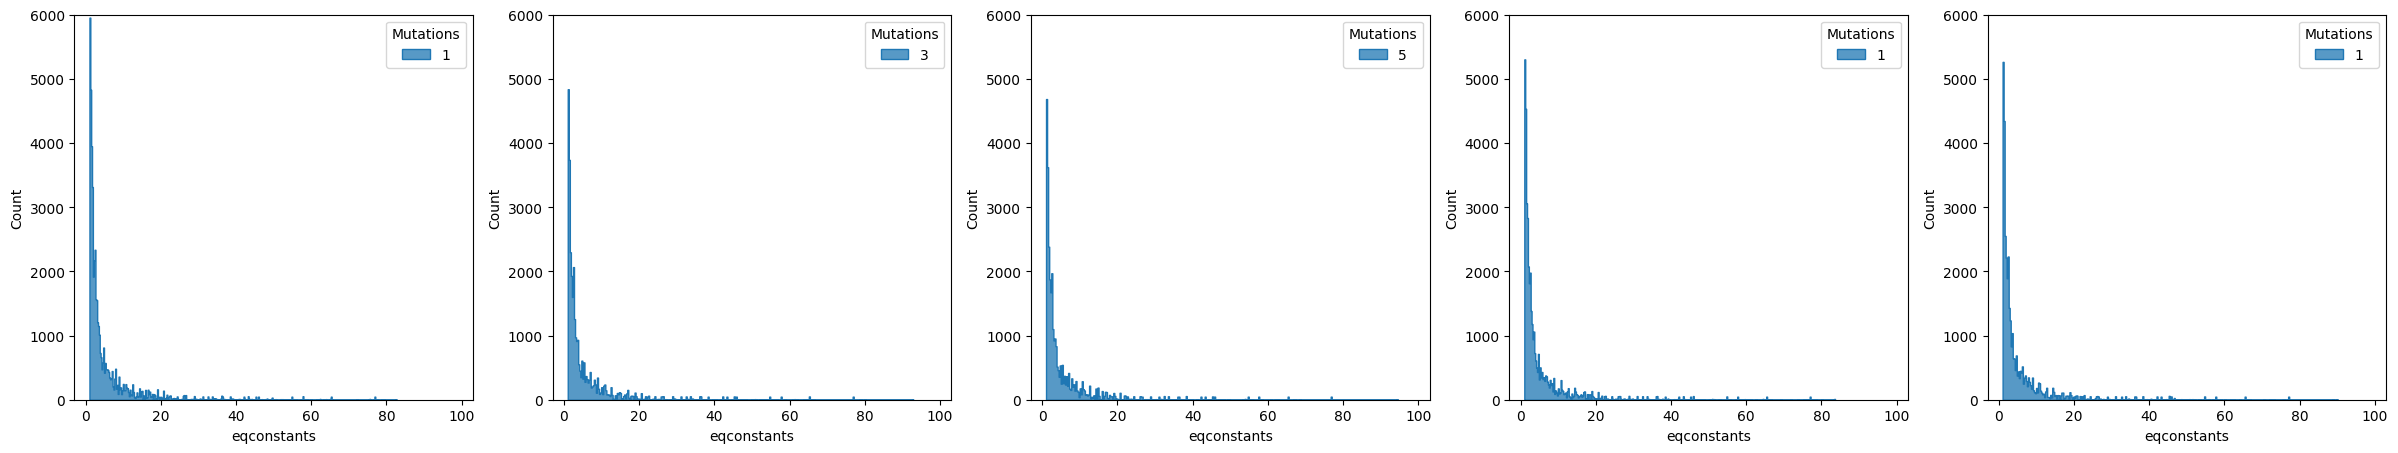

In [41]:
plt.figure(figsize=(6*len(info_summ['mutation_num'].unique()), 5))
for i, m in enumerate(info_summ['mutation_num'].unique()):
    if m != 0:
        ax = plt.subplot(1, len(info_summ['mutation_num'].unique()), i)
        sns.histplot(infom[(infom['eqconstants'] >= 1) & (infom['mutation_num'] == m)], x='eqconstants', stat='count', element='step', fill=True)
        plt.legend(str(m), title='Mutations')
        plt.xlim([-3, 103])
        plt.ylim([0,6000])


<AxesSubplot: xlabel='energies', ylabel='Count'>

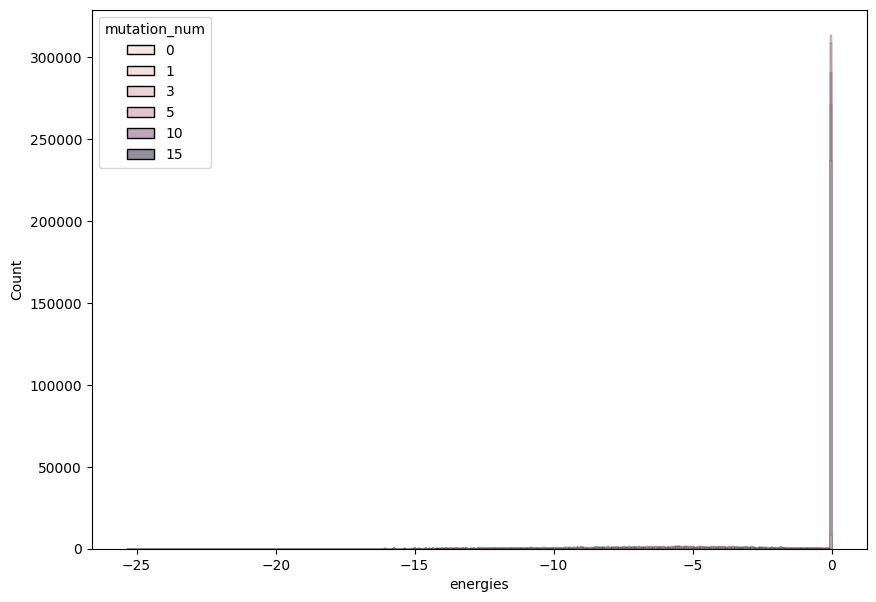

In [42]:
plt.figure(figsize=(10,7))
sns.histplot(infom[infom['sample_name'] != 'RNA_0'], x='energies', hue='mutation_num')


In [43]:
len(relevant_cols)

18

core.py:hist2d():593: Too few points to create valid contours WARNING
core.py:hist2d():593: Too few points to create valid contours WARNING
core.py:hist2d():593: Too few points to create valid contours WARNING
core.py:hist2d():593: Too few points to create valid contours WARNING
core.py:hist2d():593: Too few points to create valid contours WARNING
core.py:hist2d():593: Too few points to create valid contours WARNING
core.py:hist2d():593: Too few points to create valid contours WARNING
core.py:hist2d():593: Too few points to create valid contours WARNING
core.py:hist2d():593: Too few points to create valid contours WARNING
core.py:hist2d():593: Too few points to create valid contours WARNING
core.py:hist2d():593: Too few points to create valid contours WARNING
core.py:hist2d():593: Too few points to create valid contours WARNING
core.py:hist2d():593: Too few points to create valid contours WARNING
core.py:hist2d():593: Too few points to create valid contours WARNING
core.py:hist2d():593

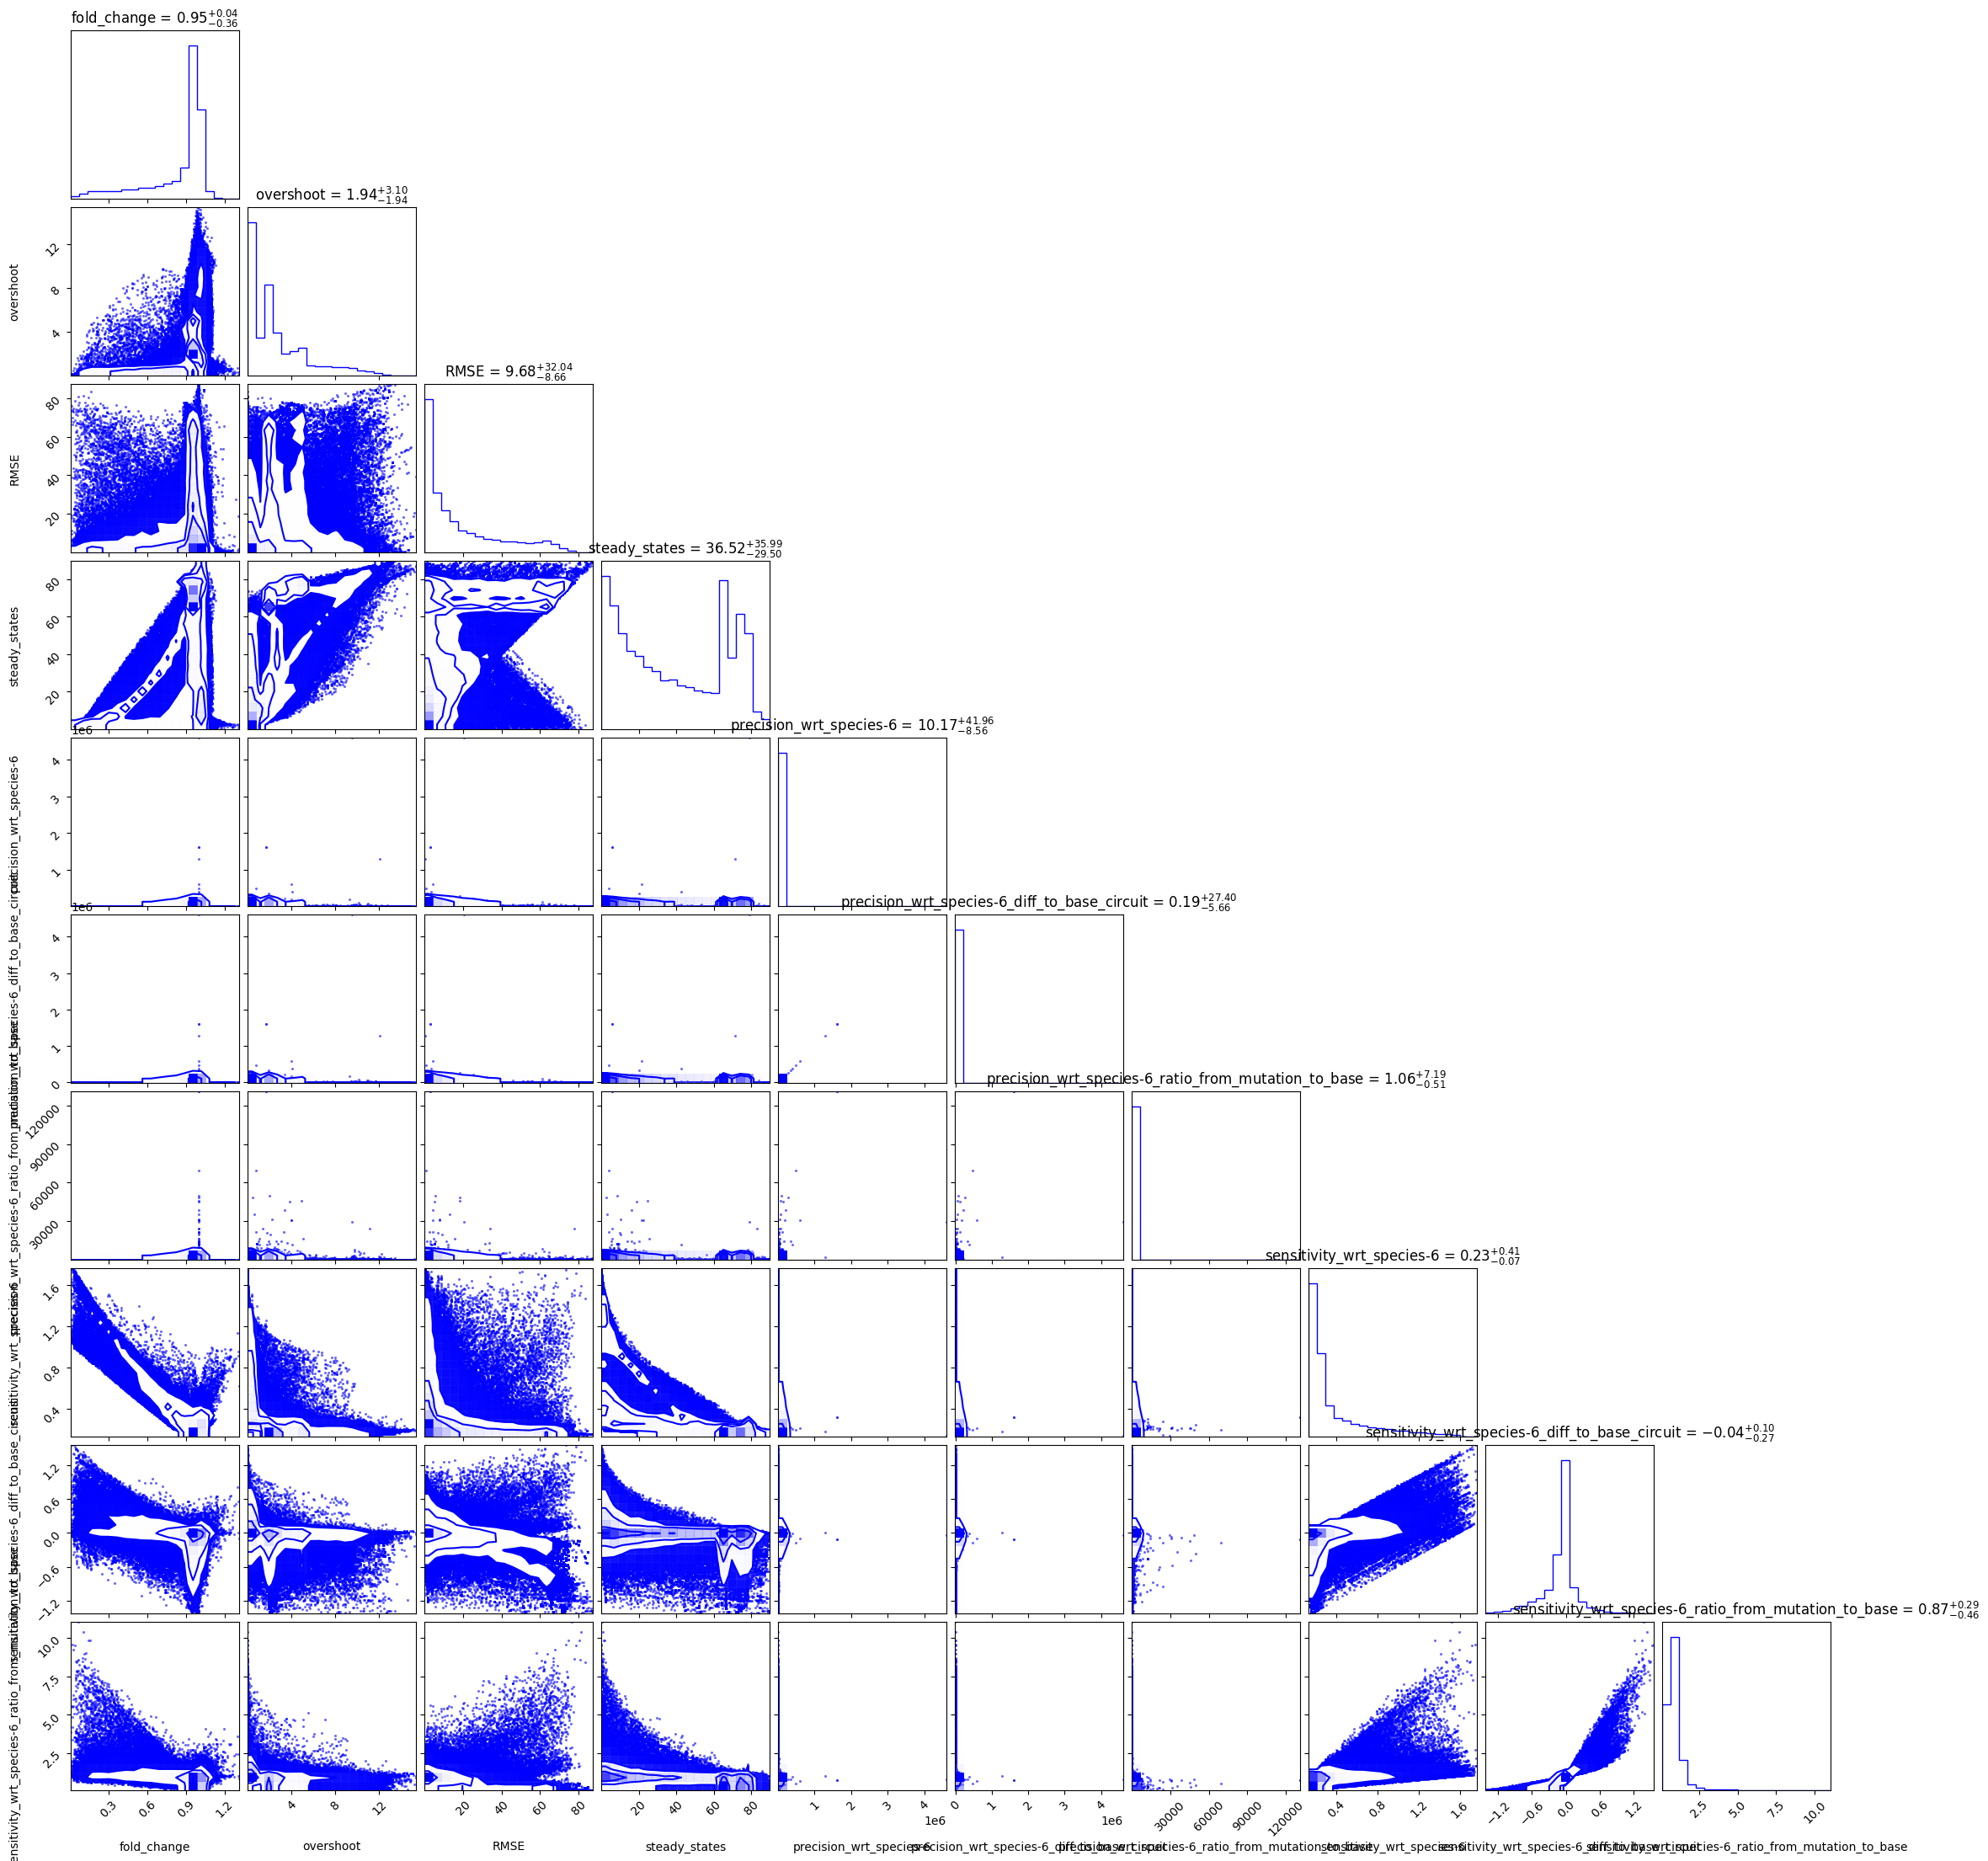

In [69]:
cols = relevant_cols[0:10]
temp = infom[(infom['sample_name'] != 'RNA_0') & (infom['precision_wrt_species-6'] != np.inf) & (infom['precision_wrt_species-6_diff_to_base_circuit'] != -np.inf)][cols]
# for c in cols:
#     if 'precision' in c:
#         temp[c] = np.log(temp[c])
fig = corner.corner(temp, labels=cols, show_titles=True, title_kwargs={"fontsize": 12}, color='b')

In [ ]:
infom[relevant_cols][(infom[relevant_cols] < np.inf) & (infom[relevant_cols] != np.nan) & (np.isnan(infom[relevant_cols]) == False)]

fold_change  overshoot       RMSE  steady_states  \
0           1.867110   0.000000   0.000000      97.915180   
1           1.014282   1.133488   0.000000      60.183170   
2           0.717795   0.000000   0.000000      16.986261   
3           1.867646   0.000000   0.023113      97.892430   
4           1.014296   1.134190   0.017068      60.201187   
...              ...        ...        ...            ...   
3266995     0.609217   0.000000   8.813139      24.353807   
3266996     0.946410   0.000000  14.157517      75.251205   
3266997     2.117699   0.000000   3.602549      93.910150   
3266998     0.608303   0.000000   6.458021      22.542273   
3266999     0.998620   0.375473  34.259808      28.173351   

         precision_wrt_species-6  \
0                       1.000000   
1                      60.712547   
2                       3.072623   
3                       1.000000   
4                      60.691450   
...                          ...   
3266995                 2.986736   
3266996                21.779633   
3266997                 1.000000   
3266998                 2.853481   
3266999               810.128360   

         precision_wrt_species-6_diff_to_base_circuit  \
0                                            0.000000   
1                                            0.000000   
2                                            0.000000   
3                                            0.000000   
4                                           -0.021099   
...                                               ...   
3266995                                     -0.050504   
3266996                                   -134.109180   
3266997                                      0.000000   
3266998                                     -0.183759   
3266999                                    654.239560   

         precision_wrt_species-6_ratio_from_mutation_to_base  \
0                                                 1.000000     
1                                                 1.000000     
2                                                 1.000000     
3                                                 1.000000     
4                                                 0.999653     
...                                                    ...     
3266995                                           0.983372     
3266996                                           0.139713     
3266997                                           1.000000     
3266998                                           0.939498     
3266999                                           5.196835     

         sensitivity_wrt_species-6  \
0                         1.000000   
1                         0.038502   
2                         0.325455   
3                         1.000000   
4                         0.038501   
...                            ...   
3266995                   0.334814   
3266996                   0.045914   
3266997                   1.000000   
3266998                   0.350449   
3266999                   0.013142   

         sensitivity_wrt_species-6_diff_to_base_circuit  \
0                                          0.000000e+00   
1                                          0.000000e+00   
2                                          0.000000e+00   
3                                          0.000000e+00   
4                                         -5.252659e-07   
...                                                 ...   
3266995                                    5.567402e-03   
3266996                                    1.936852e-02   
3266997                                    0.000000e+00   
3266998                                    2.120286e-02   
3266999                                   -1.340420e-02   

         sensitivity_wrt_species-6_ratio_from_mutation_to_base  \
0                                                 1.000000       
1                                                 1.000000       
2                        

In [ ]:
fig.savefig('test.png')

In [65]:
for r in relevant_cols:
    if any([i == -np.inf for i in infom[r]]):
        print(r)

precision_wrt_species-6_diff_to_base_circuit


end

In [ ]:
infom[relevant_cols]

fold_change  overshoot       RMSE  steady_states  \
0           1.867110   0.000000   0.000000      97.915180   
1           1.014282   1.133488   0.000000      60.183170   
2           0.717795   0.000000   0.000000      16.986261   
3           1.867646   0.000000   0.023113      97.892430   
4           1.014296   1.134190   0.017068      60.201187   
...              ...        ...        ...            ...   
3266995     0.609217   0.000000   8.813139      24.353807   
3266996     0.946410   0.000000  14.157517      75.251205   
3266997     2.117699   0.000000   3.602549      93.910150   
3266998     0.608303   0.000000   6.458021      22.542273   
3266999     0.998620   0.375473  34.259808      28.173351   

         precision_wrt_species-6  \
0                       1.000000   
1                      60.712547   
2                       3.072623   
3                       1.000000   
4                      60.691450   
...                          ...   
3266995                 2.986736   
3266996                21.779633   
3266997                 1.000000   
3266998                 2.853481   
3266999               810.128360   

         precision_wrt_species-6_diff_to_base_circuit  \
0                                            0.000000   
1                                            0.000000   
2                                            0.000000   
3                                            0.000000   
4                                           -0.021099   
...                                               ...   
3266995                                     -0.050504   
3266996                                   -134.109180   
3266997                                      0.000000   
3266998                                     -0.183759   
3266999                                    654.239560   

         precision_wrt_species-6_ratio_from_mutation_to_base  \
0                                                 1.000000     
1                                                 1.000000     
2                                                 1.000000     
3                                                 1.000000     
4                                                 0.999653     
...                                                    ...     
3266995                                           0.983372     
3266996                                           0.139713     
3266997                                           1.000000     
3266998                                           0.939498     
3266999                                           5.196835     

         sensitivity_wrt_species-6  \
0                         1.000000   
1                         0.038502   
2                         0.325455   
3                         1.000000   
4                         0.038501   
...                            ...   
3266995                   0.334814   
3266996                   0.045914   
3266997                   1.000000   
3266998                   0.350449   
3266999                   0.013142   

         sensitivity_wrt_species-6_diff_to_base_circuit  \
0                                          0.000000e+00   
1                                          0.000000e+00   
2                                          0.000000e+00   
3                                          0.000000e+00   
4                                         -5.252659e-07   
...                                                 ...   
3266995                                    5.567402e-03   
3266996                                    1.936852e-02   
3266997                                    0.000000e+00   
3266998                                    2.120286e-02   
3266999                                   -1.340420e-02   

         sensitivity_wrt_species-6_ratio_from_mutation_to_base  \
0                                                 1.000000       
1                                                 1.000000       
2                        